In [1]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
%matplotlib inline

In [38]:
#Function to populate the data files for feeding into the ML model.  It takes in the path
#to the music directory, the file name of the data file, and the encoding -- whether
#the song is classified as good (1) or bad (0)
def fill_file(music_dir, filename, encoding):
    num_songs = len(os.listdir(music_dir))
    song_count = 1
    for song in os.listdir(music_dir):
        songname = f'{music_dir}/{song}'
        
#The features extracted from the songs using the Librosa package
        y, sr = librosa.load(songname)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rms = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        row = f'{np.mean(chroma_stft)} {np.mean(rms)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}' 

        for feature in mfcc:
            row += f' {np.mean(feature)}'
            
        if encoding == 1:
            row += f' 1'
        elif encoding == 0:
            row += f' 0'
        
        file = open(filename, 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(row.split())
            
        print(f'Working on song {songname} from {music_dir}.  Song {song_count} out of {num_songs}')
        song_count += 1

In [39]:
#Here we specify the directories for the music
good_music_dir = '/home/fernando/Music/Good'
bad_music_dir = '/home/fernando/Music/Bad'
pred_music_dir = '/home/fernando/Music/Prediction'

In [40]:
#First, we create the header that will identify the columns in our data files
header = 'chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

#We open the two data files.  The first will contain the classified good and bad music,
#and the second is used to test the model's predictions
file = open('data.csv', 'w', newline = '')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
    
file = open('pred_data.csv', 'w', newline = '')
with file:
    writer = csv.writer(file)
    writer.writerow(header)

#Here, we call the 'fill_file' function to populate the data files
fill_file(good_music_dir, 'data.csv', 1)
fill_file(bad_music_dir, 'data.csv', 0)
fill_file(pred_music_dir, 'pred_data.csv', 0)

/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/01 Is This It.mp3 from /home/fernando/Music/Good.  Song 1 out of 49


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/01 Take Me In Your Army_[plixid.com].mp3 from /home/fernando/Music/Good.  Song 2 out of 49


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/01 – Star Treatment.mp3 from /home/fernando/Music/Good.  Song 3 out of 49


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/01. Leave It In My Dreams.mp3 from /home/fernando/Music/Good.  Song 4 out of 49


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/02 Crunch Punch_[plixid.com].mp3 from /home/fernando/Music/Good.  Song 5 out of 49


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/02 The Modern Age.mp3 from /home/fernando/Music/Good.  Song 6 out of 49


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/02 – One Point Perspective.mp3 from /home/fernando/Music/Good.  Song 7 out of 49


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/02. QYURRYUS.mp3 from /home/fernando/Music/Good.  Song 8 out of 49


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/03 M.Utually A.Ssured D.Estruction_[plixid.com].mp3 from /home/fernando/Music/Good.  Song 9 out of 49


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/03 Soma.mp3 from /home/fernando/Music/Good.  Song 10 out of 49


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/03 – American Sports.mp3 from /home/fernando/Music/Good.  Song 11 out of 49


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/03. Pyramid of Bones.mp3 from /home/fernando/Music/Good.  Song 12 out of 49


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/04 Barely Legal.mp3 from /home/fernando/Music/Good.  Song 13 out of 49


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/04 Human Sadness_[plixid.com].mp3 from /home/fernando/Music/Good.  Song 14 out of 49


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/04 – Tranquility Base Hotel & Casino.mp3 from /home/fernando/Music/Good.  Song 15 out of 49


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/04. Permanent High School.mp3 from /home/fernando/Music/Good.  Song 16 out of 49


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/05 Someday.mp3 from /home/fernando/Music/Good.  Song 17 out of 49


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/05 Where No Eagles Fly_[plixid.com].mp3 from /home/fernando/Music/Good.  Song 18 out of 49


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/05 – Golden Trunks.mp3 from /home/fernando/Music/Good.  Song 19 out of 49


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/05. ALieNNatioN.mp3 from /home/fernando/Music/Good.  Song 20 out of 49


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/06 Alone, Together.mp3 from /home/fernando/Music/Good.  Song 21 out of 49


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/06 Father Electricity_[plixid.com].mp3 from /home/fernando/Music/Good.  Song 22 out of 49


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/06 – Four out of Five.mp3 from /home/fernando/Music/Good.  Song 23 out of 49


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/06. One of the Ones.mp3 from /home/fernando/Music/Good.  Song 24 out of 49


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/07 Johan Von Bronx_[plixid.com].mp3 from /home/fernando/Music/Good.  Song 25 out of 49


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/07 Last Nite.mp3 from /home/fernando/Music/Good.  Song 26 out of 49


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/07 – The World’s First Ever Monster Truck Front Flip.mp3 from /home/fernando/Music/Good.  Song 27 out of 49


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/07. All Wordz Are Made Up.mp3 from /home/fernando/Music/Good.  Song 28 out of 49


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/08 Business Dog_[plixid.com].mp3 from /home/fernando/Music/Good.  Song 29 out of 49


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/08 Hard to Explain.mp3 from /home/fernando/Music/Good.  Song 30 out of 49


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/08 – Science Fiction.mp3 from /home/fernando/Music/Good.  Song 31 out of 49


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/08. Think Before You Drink.mp3 from /home/fernando/Music/Good.  Song 32 out of 49


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/09 When It Started.mp3 from /home/fernando/Music/Good.  Song 33 out of 49


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/09 Xerox_[plixid.com].mp3 from /home/fernando/Music/Good.  Song 34 out of 49


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/09 – She Looks Like Fun.mp3 from /home/fernando/Music/Good.  Song 35 out of 49


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/09. Wink.mp3 from /home/fernando/Music/Good.  Song 36 out of 49


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/10 Dare I Care_[plixid.com].mp3 from /home/fernando/Music/Good.  Song 37 out of 49


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/10 Trying Your Luck.mp3 from /home/fernando/Music/Good.  Song 38 out of 49


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/10 – Batphone.mp3 from /home/fernando/Music/Good.  Song 39 out of 49


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/10. My Friend the Walls.mp3 from /home/fernando/Music/Good.  Song 40 out of 49


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/11 Nintendo Blood_[plixid.com].mp3 from /home/fernando/Music/Good.  Song 41 out of 49


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/11 Take It or Leave It.mp3 from /home/fernando/Music/Good.  Song 42 out of 49


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/11 – The Ultracheese.mp3 from /home/fernando/Music/Good.  Song 43 out of 49


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/11. Pink Ocean.mp3 from /home/fernando/Music/Good.  Song 44 out of 49


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/12 Off To War..._[plixid.com].mp3 from /home/fernando/Music/Good.  Song 45 out of 49


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/12. Black Hole.mp3 from /home/fernando/Music/Good.  Song 46 out of 49


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/13. Lazy Boy.mp3 from /home/fernando/Music/Good.  Song 47 out of 49


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/14. We're Where We Were.mp3 from /home/fernando/Music/Good.  Song 48 out of 49


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Good/15. Pointlessness.mp3 from /home/fernando/Music/Good.  Song 49 out of 49


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Bad/01. Ain't Equal.mp3 from /home/fernando/Music/Bad.  Song 1 out of 29


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Bad/01. Intro _ Persona.mp3 from /home/fernando/Music/Bad.  Song 2 out of 29


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Bad/02. Boy With Luv (Feat. Halsey).mp3 from /home/fernando/Music/Bad.  Song 3 out of 29


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Bad/02. Savage.mp3 from /home/fernando/Music/Bad.  Song 4 out of 29


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Bad/03. Captain Hook.mp3 from /home/fernando/Music/Bad.  Song 5 out of 29


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Bad/03. Make It Right.mp3 from /home/fernando/Music/Bad.  Song 6 out of 29


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Bad/04. Hit My Phone feat. Kehlani.mp3 from /home/fernando/Music/Bad.  Song 7 out of 29


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Bad/04. Jamais Vu.mp3 from /home/fernando/Music/Bad.  Song 8 out of 29


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Bad/05. B.I.T.C.H.mp3 from /home/fernando/Music/Bad.  Song 9 out of 29


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Bad/05. Dionysus.mp3 from /home/fernando/Music/Bad.  Song 10 out of 29


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Bad/06. Interlude _ Shadow.mp3 from /home/fernando/Music/Bad.  Song 11 out of 29


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Bad/06. Rich.mp3 from /home/fernando/Music/Bad.  Song 12 out of 29


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Bad/07. Black Swan.mp3 from /home/fernando/Music/Bad.  Song 13 out of 29


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Bad/07. Stop Playing feat. Gunna.mp3 from /home/fernando/Music/Bad.  Song 14 out of 29


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Bad/08. Crying In The Car.mp3 from /home/fernando/Music/Bad.  Song 15 out of 29


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Bad/08. Filter.mp3 from /home/fernando/Music/Bad.  Song 16 out of 29


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Bad/09. My Time.mp3 from /home/fernando/Music/Bad.  Song 17 out of 29


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Bad/09. What I Need.mp3 from /home/fernando/Music/Bad.  Song 18 out of 29


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Bad/10. Louder than bombs.mp3 from /home/fernando/Music/Bad.  Song 19 out of 29


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Bad/11. ON.mp3 from /home/fernando/Music/Bad.  Song 20 out of 29


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Bad/12. UGH!.mp3 from /home/fernando/Music/Bad.  Song 21 out of 29


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Bad/13. 00_00 (Zero O’Clock).mp3 from /home/fernando/Music/Bad.  Song 22 out of 29


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Bad/14. Inner Child.mp3 from /home/fernando/Music/Bad.  Song 23 out of 29


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Bad/15. Friends.mp3 from /home/fernando/Music/Bad.  Song 24 out of 29


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Bad/16. Moon.mp3 from /home/fernando/Music/Bad.  Song 25 out of 29


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Bad/17. Respect.mp3 from /home/fernando/Music/Bad.  Song 26 out of 29


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Bad/18. We are Bulletproof _ the Eternal.mp3 from /home/fernando/Music/Bad.  Song 27 out of 29


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Bad/19. Outro _ Ego.mp3 from /home/fernando/Music/Bad.  Song 28 out of 29


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Bad/20. ON (Feat. Sia).mp3 from /home/fernando/Music/Bad.  Song 29 out of 29


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Prediction/01 You Only Live Once.mp3 from /home/fernando/Music/Prediction.  Song 1 out of 15


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Prediction/02 Juicebox.mp3 from /home/fernando/Music/Prediction.  Song 2 out of 15


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Prediction/03 Heart in a Cage.mp3 from /home/fernando/Music/Prediction.  Song 3 out of 15


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Prediction/04 Razorblade.mp3 from /home/fernando/Music/Prediction.  Song 4 out of 15


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Prediction/05 On the Other Side.mp3 from /home/fernando/Music/Prediction.  Song 5 out of 15


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Prediction/06 Vision of Division.mp3 from /home/fernando/Music/Prediction.  Song 6 out of 15


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Prediction/07 Ask Me Anything.mp3 from /home/fernando/Music/Prediction.  Song 7 out of 15


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Prediction/08 Electricityscape.mp3 from /home/fernando/Music/Prediction.  Song 8 out of 15


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Prediction/09 Killing Lies.mp3 from /home/fernando/Music/Prediction.  Song 9 out of 15


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Prediction/10 Fear of Sleep.mp3 from /home/fernando/Music/Prediction.  Song 10 out of 15


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Prediction/11 15 Minutes.mp3 from /home/fernando/Music/Prediction.  Song 11 out of 15


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Prediction/12 Ize of the World.mp3 from /home/fernando/Music/Prediction.  Song 12 out of 15


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Prediction/13 Evening Sun.mp3 from /home/fernando/Music/Prediction.  Song 13 out of 15


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Prediction/14 Red Light.mp3 from /home/fernando/Music/Prediction.  Song 14 out of 15


/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Working on song /home/fernando/Music/Prediction/15 Cool With You.mp3 from /home/fernando/Music/Prediction.  Song 15 out of 15


In [51]:
#We read the data from the csv files and covert it into a pandas data frame
data = pd.read_csv('data.csv')
pred_data = pd.read_csv('pred_data.csv')

In [53]:
#This encodes the data.  This is not strictly necessary, since the songs are already classified
#with 1's and 0's, but the encodings are transformed into a convenient format to feed to the model
good_bad = data.iloc[:, -1]
encoder = LabelEncoder()
ymodel_data = encoder.fit_transform(good_bad)
print(ymodel_data)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


In [43]:
#The data is scaled, and also the data used to train the model is split into training
#and validation data sets
scaler = StandardScaler()
xmodel_data = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))
xpred_data = scaler.fit_transform(np.array(pred_data.iloc[:, :-1], dtype = float))

x_train, x_test, y_train, y_test = train_test_split(xmodel_data, ymodel_data, test_size = 0.2)

In [44]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, LSTM, Lambda
from tensorflow.python.keras.callbacks import LambdaCallback
from tensorflow.python.keras.regularizers import l2
import tensorflow as tf

In [54]:
#The model is defined.  We use weighted and dropout regularization to avoid over-fitting.
model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape = (x_train.shape[1],), kernel_regularizer = l2(0.001)))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               13824     
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 129       
Total params: 178,177
Trainable params: 178,177
Non-trainable params: 0
_________________________________________________________________


In [55]:
#We create the model
simple_log = LambdaCallback(on_epoch_end = lambda e, l: print(e, end = '.'))
E = 15

h = model.fit(
    x_train, y_train,
    epochs = E,
    validation_data = (x_test, y_test),
    callbacks = [simple_log],
    verbose = False)

0.1.2.3.4.5.6.7.8.9.10.11.12.13.14.

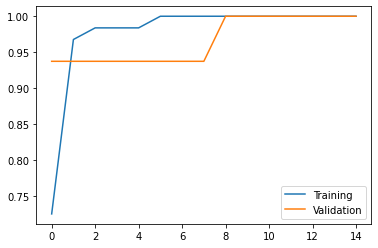

In [56]:
#Plot showing the accuracy and validation accuracy across epochs
plt.plot(range(E), h.history['accuracy'], label = 'Training')
plt.plot(range(E), h.history['val_accuracy'], label = 'Validation')
plt.legend()
plt.show()

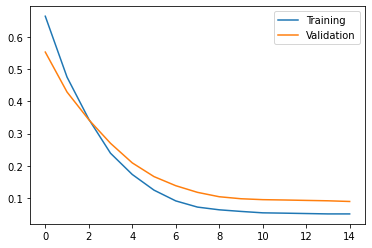

In [57]:
#Plot showing the loss and validation loss across epochs
plt.plot(range(E), h.history['loss'], label = 'Training')
plt.plot(range(E), h.history['val_loss'], label = 'Validation')
plt.legend()
plt.show()

In [58]:
#Finally, we generate predictions on our prediction data
predictions = model.predict(xpred_data)
print(predictions)
tf.greater(predictions, 0.5)

[[9.9336529e-01]
 [2.0430684e-03]
 [6.1164629e-01]
 [8.2798791e-01]
 [7.1901083e-03]
 [4.4489500e-01]
 [1.0000000e+00]
 [9.9999475e-01]
 [1.0000000e+00]
 [9.9997079e-01]
 [5.5876374e-03]
 [1.5455484e-04]
 [9.1029406e-02]
 [5.6989193e-03]
 [9.9996036e-01]]


<tf.Tensor: shape=(15, 1), dtype=bool, numpy=
array([[ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True]])>